In [145]:
import pandas as pd

In [146]:
X_full =pd.read_csv("Train.csv",index_col='date_time',parse_dates=True)
X_test_full =pd.read_csv("Test.csv",index_col='date_time',parse_dates=True)

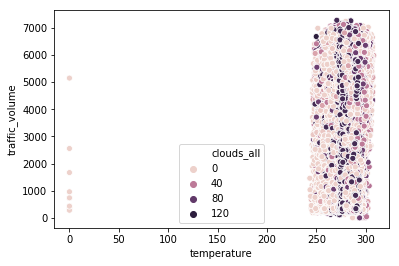

In [147]:
import seaborn as sns

sns.scatterplot(x=X_full["temperature"],y=X_full["traffic_volume"],hue=X_full["clouds_all"])


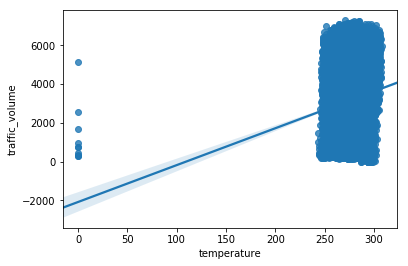

In [148]:
#sns.regplot(x=X_full["temperature"],y=X_full["traffic_volume"])

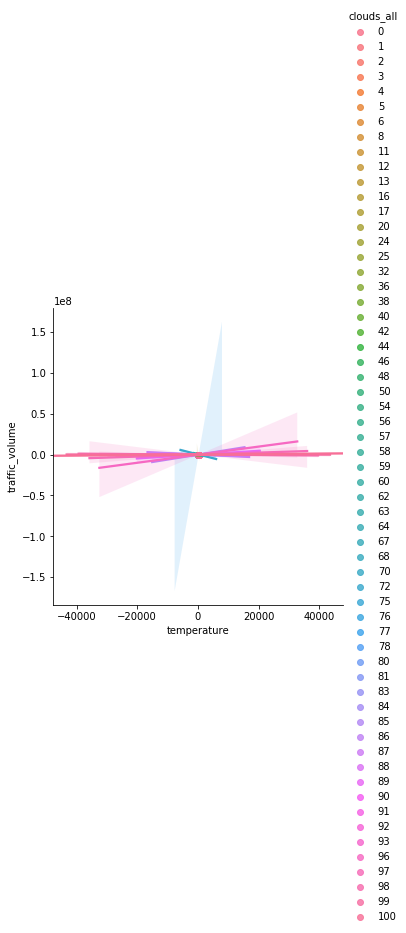

In [149]:
#sns.lmplot(x="temperature",y='traffic_volume',hue='clouds_all',data=X_full)

In [150]:
print(X_full.shape)
X_full.head()


(33750, 14)


,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
02-10-2012 9.00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
02-10-2012 10.00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
02-10-2012 11.00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
02-10-2012 12.00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
02-10-2012 13.00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [151]:
print(X_test_full.shape)
X_test_full.head()

(14454, 13)


,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [152]:
y=X_full.traffic_volume
X_full.drop(["traffic_volume"],axis=1,inplace=True)


In [153]:

X=X_full.select_dtypes(exclude=['object'])
#X=X_full[["temperature"]]#,"clouds_all"]]#,"snow_p_h","rain_p_h"]]
X_test=X_test_full.select_dtypes(exclude=['object'])
#X_test=X_test_full[["temperature"]]#,"clouds_all"]]#,"snow_p_h","rain_p_h"]]
print(X.shape)
print(X_test.shape)

(33750, 10)
(14454, 10)


In [154]:
X.head()


,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
date_time,,,,,,,,,,
02-10-2012 9.00,121,89,2,329,1,1,288.28,0.0,0.0,40
02-10-2012 10.00,178,67,3,330,1,1,289.36,0.0,0.0,75
02-10-2012 11.00,113,66,3,329,2,2,289.58,0.0,0.0,90
02-10-2012 12.00,20,66,3,329,5,5,290.13,0.0,0.0,90
02-10-2012 13.00,281,65,3,329,7,7,291.14,0.0,0.0,75


In [155]:
from sklearn.model_selection import train_test_split as TTS
X_train,X_valid,y_train,y_valid=TTS(X,y,train_size=0.8,test_size=0.2,random_state=7)

In [156]:
X_train.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
date_time,,,,,,,,,,
27-03-2014 6.00,126,86,2,270,5,5,276.700,0.25,0.0,90
08-07-2015 3.00,32,64,2,141,7,7,285.480,0.00,0.0,1
19-07-2016 2.00,232,93,2,320,2,2,297.888,0.00,0.0,0
21-11-2013 6.00,231,61,7,320,4,4,276.110,0.00,0.0,90
07-05-2016 14.00,69,75,1,259,1,1,292.970,0.00,0.0,75


In [157]:
print(X_train.shape)
missing_val_count_by_column = (X_train.isnull().sum())

print(missing_val_count_by_column)

(27000, 10)
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
dtype: int64


In [158]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error as MAE

def rand_forest(X_train,X_valid,y_train,y_valid,n):
    model=RFR(n_estimators=n,random_state=1)
    model.fit(X_train,y_train)
    preds=model.predict(X_valid)
    return (MAE(y_valid,preds))

In [159]:
from sklearn import linear_model
def linear_reg(X_train,X_valid,y_train,y_valid):
    regr=linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    lpreds=regr.predict(X_valid)
    return MAE(y_valid,lpreds)


In [160]:
#trials=[600,700,800]
#for n in trials:
#   print(n,":\t",rand_forest(X_train,X_valid,y_train,y_valid,n))

In [161]:
temp_model=RFR(n_estimators=100,random_state=1)
temp_model.fit(X_train,y_train)
preds_test=temp_model.predict(X_valid)
print(MAE(y_valid,preds_test))

1514.7886829629629


In [162]:
print(linear_reg(X_train,X_valid,y_train,y_valid))

1719.6161753803547


In [198]:
print(XGB(X_train,X_valid,y_train,y_valid))

[23:04:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Saranga\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


1653.9504268663195


In [197]:
from xgboost import XGBRegressor

def XGB(X_train,X_valid,y_train,y_valid):
    model=XGBRegressor(n_estimators=1000,learning_rate=0.9)
    model.fit(X_train,y_train,early_stopping_rounds=6,eval_set=[(X_valid,y_valid)],verbose=False)
    xpreds=model.predict(X_valid)
    return MAE(y_valid,xpreds)

In [ ]:
final_model=RFR(n_estimators=100,random_state=1)
final_model.fit(X,y)
preds_test=final_model.predict(X_test)
output=pd.DataFrame({'date_time':X_test.index,'traffic_volume':preds_test})
output.to_csv("submission2.csv",index=False)
output